# Challenge - What Do You See?
I had read an article discussing US Household Income and the relative slow growth for the lowest and second quintile.  The data is pulled from www.census.gov/data using 'Historical Income Tables: Households'.  I mainly was interested in the all household data, but also include some plots broken out by race.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from collections import defaultdict

In [2]:
# divides all column values by cell value in last row
def normal_columns_by_last(df):    
    for col in df.columns:      
        new_col = 'norm_' + col
        S = pd.Series(df.at[len(df.index) - 1, col], np.arange(len(df.index)))
        df[new_col] = df[col] / S
    return df
    
    

In [3]:
# divides all column values by cell value in last row
def normal_columns_by_Third(df):    
    for col in df.columns:
        if col in ['Lowest', 'Second', 'Third', 'Fourth', 'Upper']: # so only original cols used to make plotting cols
            new_col =  col + '_Third'
            df[new_col] = df[col] / df['Third'] 
    return df

In [4]:
# get dxfs ready for plotting
def income_df_clean(df):  
    
    df.columns = ['Lowest', 'Second', 'Third', 'Fourth', 'Upper'] # all columns don't come in correctly
    df = df.drop(5)                                               # two entries for 2013
    df.index = np.arange(0,len(df.index))                         # fix index for drop
    df = normal_columns_by_last(df)                               # adding columns for plotting purposes
    normal_columns_by_Third(df)                                    # adding columns for plotting purposes
    df['Year'] = np.arange(2017, 2017 - len(df.index), -1)        # add Year column
    
    return df

In [5]:
#pandas read excel for list of arguments from dict 'args'
def xls_to_df(list):            
    return  pd.read_excel(list[0], index_col=None, na_values=['NA'], sheet_name=list[1],
                         header=list[2], nrows=list[3], usecols=list[4]
                          )    


In [6]:
def clean_household_plot(list):
    df = xls_to_df(list[0])
    if len(list) == 1:
        return income_df_clean(df)
    else:
        D = [df]
        for i in range(1,len(list)):
            D.append(xls_to_df(list[i])) 
            df = pd.concat(D, ignore_index=True)
        return income_df_clean(df)

In [7]:
# arguments required to go from xls to df in dict of lists

loc_alr = r'h01ar.xls'
loc_wht = r'h01w.xls'
loc_blk = r'h01b.xls'
loc_hsp = r'h01h.xls'
loc_asn = r'h01a.xls'

args = {'alr' : [[loc_alr, 'h01ar', 60, 52, 'C:G']],                                    # all 2017 to 1967
        'hsp' : [[loc_hsp, 'h01h', 55, 47, 'C:G']],                                     # hispanic only 2017 to 1972
        'asn' : [[loc_asn, 'h01a', 67, 17, 'C:G']],                                     # asian only 2017 to 2002
        'wht' : [[loc_wht, 'h01w',  65, 17, 'C:G'], [loc_wht, 'h01w',  85, 35, 'C:G']], # white only 2017 to 1967
        'blk' : [[loc_blk, 'h01b', 105, 17, 'C:G'], [loc_blk, 'h01b', 125, 35, 'C:G']]  # black only 2017 to 1967
        }


In [8]:
# create dict of dataframes with same keys as args dict. 
d_dfs = defaultdict(pd.DataFrame)
for k,v in args.items():
    d_dfs[k] = clean_household_plot(v)

In [12]:
print(d_dfs.keys())

dict_keys(['alr', 'hsp', 'asn', 'wht', 'blk'])


In [ ]:
print(d_dfs['blk'].head(5))
print(d_dfs['blk'].tail(5))


In [10]:
#save the df's to csv 
d_dfs.keys()

dict_keys(['alr', 'hsp', 'asn', 'wht', 'blk'])

## First plot.
The household income data is from 1967 to 2017 in 2017 dollars.  Each year includes the upper limit of the lowest quintile (20th percentile), the upper limit of the second quintile (40th percentile), the upper limit of the third quintile (60th percentile), the upper limit of the fourth quintile (80th percentile) and the lower limit of the upper 5% (95th percentile).  It's a good plot, but does not emphasize the difference in the rate of change of different percentile income levels.

In [11]:
style.use('fivethirtyeight')

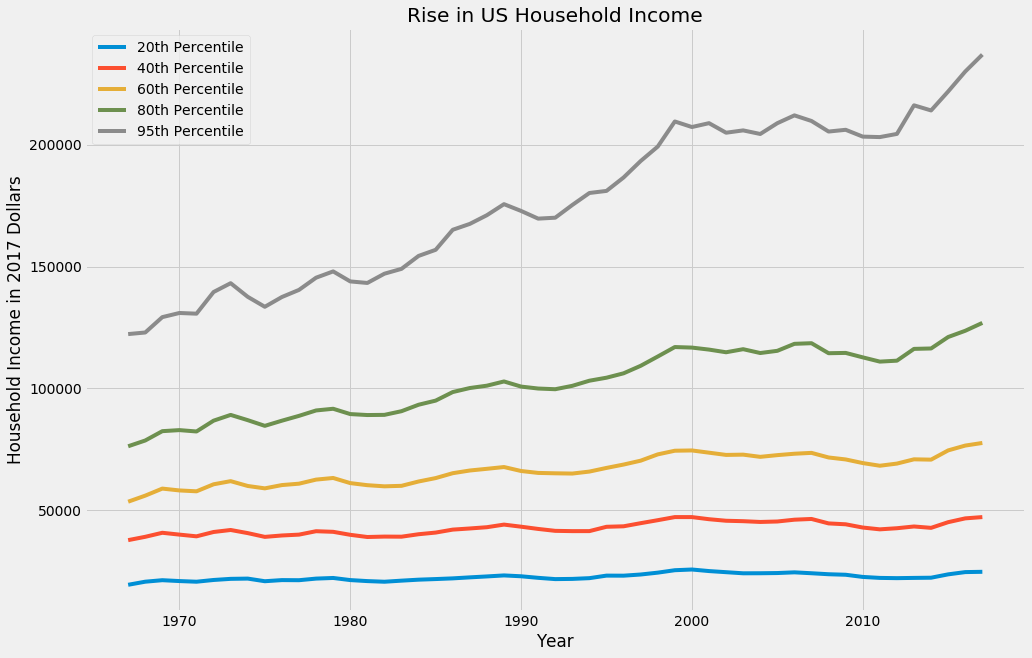

In [12]:
x = d_dfs['alr']['Year']
y1 = d_dfs['alr']['Lowest']
y2 = d_dfs['alr']['Second']
y3 = d_dfs['alr']['Third']
y4 = d_dfs['alr']['Fourth']
y5 = d_dfs['alr']['Upper']
plt.figure(figsize=(15, 10))

plt.plot(x, y1, label='20th Percentile')
plt.plot(x, y2, label='40th Percentile')
plt.plot(x, y3, label='60th Percentile')
plt.plot(x, y4, label='80th Percentile')
plt.plot(x, y5, label='95th Percentile')

plt.xlabel('Year')
plt.ylabel('Household Income in 2017 Dollars')

plt.title("Rise in US Household Income")

plt.legend()

plt.show()



# Second plot 
I was interested in the relative rise in income between the different quintiles.  I first tried to normalize the data by dividing by the 1967 income.  So the all five levels are 1.00 in 1967. Don't really like the plot, but it does show that the higher income levels increase more over the time span shown.  Also demonstrates that the 20th perecentile rose at a slightly higher rate than the 40th percentile. 

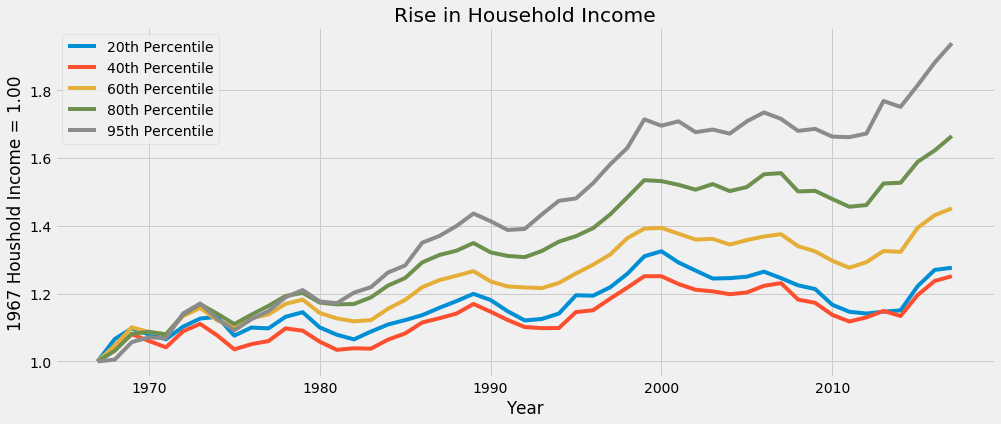

In [13]:
x = d_dfs['alr']['Year']
y1 = d_dfs['alr']['norm_Lowest']
y2 = d_dfs['alr']['norm_Second']
y3 = d_dfs['alr']['norm_Third']
y4 = d_dfs['alr']['norm_Fourth']
y5 = d_dfs['alr']['norm_Upper']
plt.figure(figsize=(15, 6))

plt.plot(x, y1, label='20th Percentile')
plt.plot(x, y2, label='40th Percentile')
plt.plot(x, y3, label='60th Percentile')
plt.plot(x, y4, label='80th Percentile')
plt.plot(x, y5, label='95th Percentile')

plt.xlabel('Year')
plt.ylabel('1967 Houshold Income = 1.00')

plt.title("Rise in Household Income")

plt.legend()

plt.show()

# Third plot

This plot divides all the income data by the 60th percentile income for that year.  It shows the "income gap" that I was looking for though maybe not in a public sense without further explaination.  


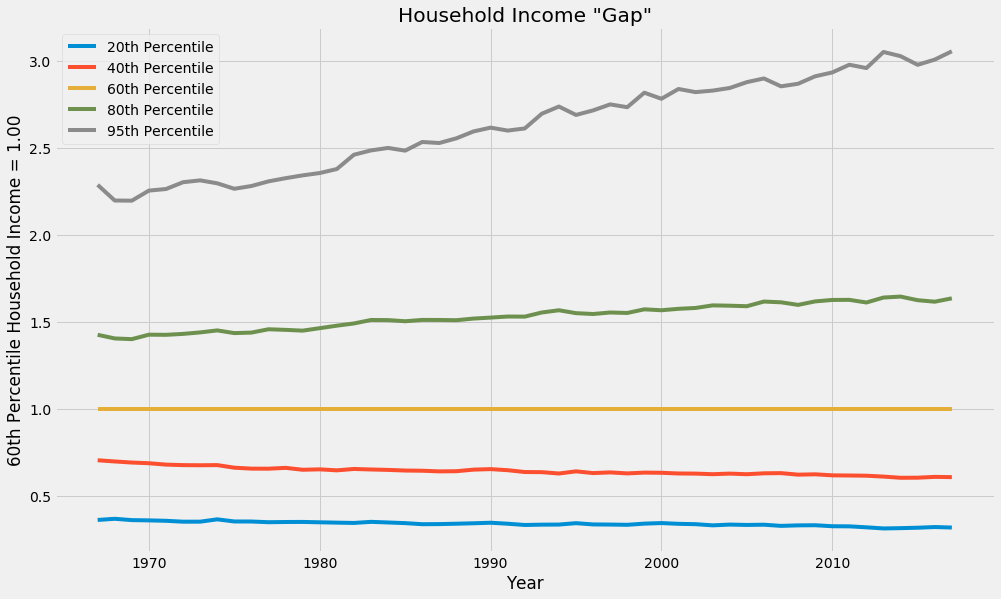

In [37]:
x = d_dfs['alr']['Year']
y1 = d_dfs['alr']['Lowest_Third']
y2 = d_dfs['alr']['Second_Third']
y3 = d_dfs['alr']['Third_Third']
y4 = d_dfs['alr']['Fourth_Third']
y5 = d_dfs['alr']['Upper_Third']
plt.figure(figsize=(15, 9))

plt.plot(x, y1, label='20th Percentile')
plt.plot(x, y2, label='40th Percentile')
plt.plot(x, y3, label='60th Percentile')
plt.plot(x, y4, label='80th Percentile')
plt.plot(x, y5, label='95th Percentile')

plt.xlabel('Year')
plt.ylabel('60th Percentile Household Income = 1.00')

plt.title('Household Income "Gap"')

plt.legend()

plt.show()

# Fourth Plot

I delve into the data broken out into to different demographic groups.  I am showing it across the 1967 to 2017 timeframe attempting to match the vertical scale of the first plot.  This is the 40th percentiles by race.  I plotted all five percentiles but the plots did not show anything noteworthy.  

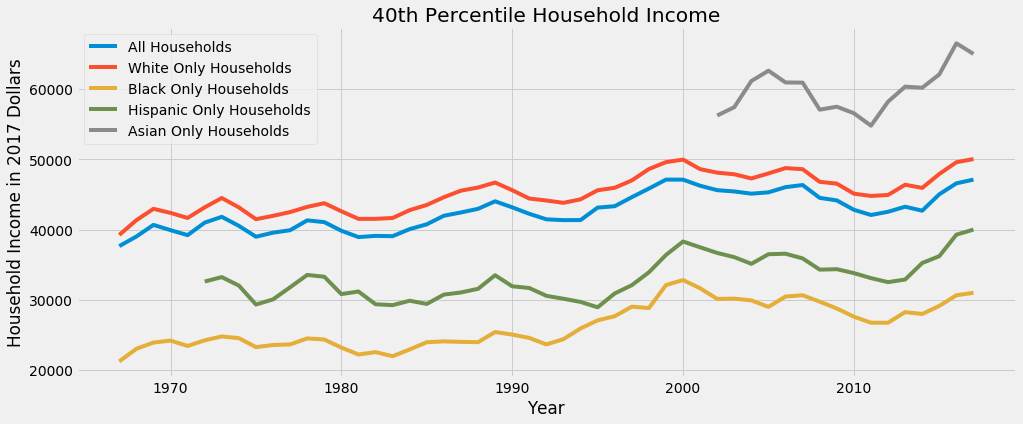

In [38]:
x1 = d_dfs['alr']['Year']
x2 = d_dfs['hsp']['Year']
x3 = d_dfs['asn']['Year']
y1 = d_dfs['alr']['Second']
y2 = d_dfs['wht']['Second']
y3 = d_dfs['blk']['Second']
y4 = d_dfs['hsp']['Second']
y5 = d_dfs['asn']['Second']

plt.figure(figsize=(15, 6))

plt.plot(x1, y1, label='All Households')
plt.plot(x1, y2, label='White Only Households')
plt.plot(x1, y3, label='Black Only Households')
plt.plot(x2, y4, label='Hispanic Only Households')
plt.plot(x3, y5, label='Asian Only Households')

plt.xlabel('Year')
plt.ylabel('Household Income in 2017 Dollars')

plt.title("40th Percentile Household Income")

plt.legend()

plt.show()

# Fifth Plot
For grins, explore the 60th percentile "middle class" in the same manner as the third plot.  Use the largest demographic "white" to normalize.  

In [41]:
tul = pd.DataFrame(index=range(51))
tul['Year'] = d_dfs['wht']['Year']
for k,v in d_dfs.items():
    tul[k] = v['Third'] / d_dfs['alr']['Third']
print(tul.tail(5))

    Year  alr  hsp  asn       wht       blk
46  1971  1.0  NaN  NaN  1.033018  0.656660
47  1970  1.0  NaN  NaN  1.032298  0.660954
48  1969  1.0  NaN  NaN  1.027428  0.640973
49  1968  1.0  NaN  NaN  1.040973  0.643960
50  1967  1.0  NaN  NaN  1.037826  0.632297


In [42]:
print(tul.head(5))

   Year  alr       hsp       asn       wht       blk
0  2017  1.0  0.812358  1.310295  1.044654  0.658178
1  2016  1.0  0.801396  1.340682  1.039854  0.667830
2  2015  1.0  0.776652  1.372869  1.045639  0.668662
3  2014  1.0  0.776998  1.389496  1.049378  0.659783
4  2013  1.0  0.744049  1.350445  1.055767  0.663179


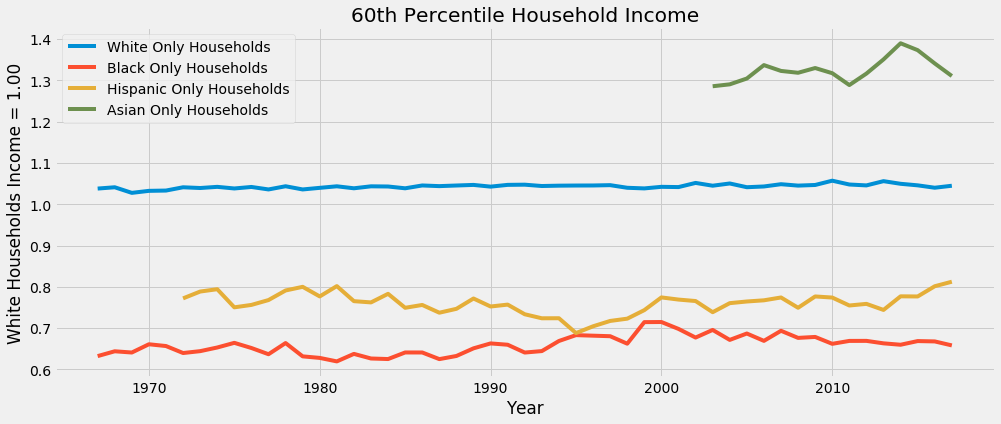

In [43]:
x1 = tul['Year']
x2 = tul['Year'][:46]
x3 = tul['Year'][:15]
y2 = tul['wht']
y3 = tul['blk']
y4 = tul['hsp'][:46]
y5 = tul['asn'][:15]

plt.figure(figsize=(15, 6))


plt.plot(x1, y2, label='White Only Households')
plt.plot(x1, y3, label='Black Only Households')
plt.plot(x2, y4, label='Hispanic Only Households')
plt.plot(x3, y5, label='Asian Only Households')

plt.xlabel('Year')
plt.ylabel('White Households Income = 1.00')

plt.title("60th Percentile Household Income")

plt.legend()

plt.show()